In [3]:
import netCDF4 as nc
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
from scipy import stats

The following code loads in the dataset and takes out the data we want, which are the velocity measurements in the 3 dimensions. The sensor takes data points in "bursts", with each burst taking in 2080 measurements. There were 3948 bursts in total, however after the 778th data point, the velocity measured was 0. Nex, I took the mean mean vellocity in each burst of data. 

In [12]:
ds = nc.Dataset("WTS21BTV02vec-b.cdf")
#Took 3948 bursts of data points and each burst has 2080 measurements 

vel1 = ds["VEL1"]
vel2 = ds["VEL2"]
vel3 = ds["VEL3"]
vel1_mean = pd.Series(np.mean(vel1, axis=1))
vel2_mean = pd.Series(np.mean(vel2, axis=1))
vel3_mean = pd.Series(np.mean(vel3, axis=1))

The next three graphs plots out the velocities in each dimensions chronologically. The 3rd dimension has much lower magnitude in velocity because it is in the vertical direction.

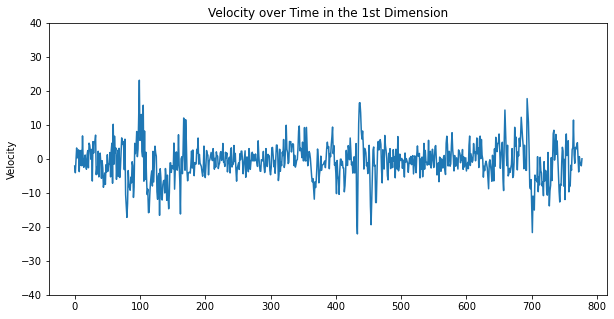

In [15]:
fig = plt.figure(figsize=(10,5))
plt.plot(vel1_mean[0:778])
plt.title("Velocity over Time in the 1st Dimension")
plt.ylabel("Velocity")
plt.ylim([-40,40])
plt.show()

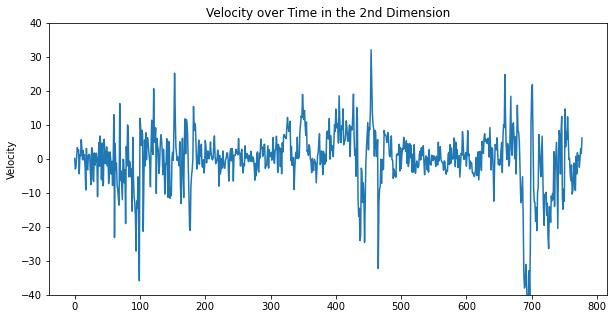

In [14]:
fig = plt.figure(figsize=(10,5))
plt.plot(vel2_mean[0:778])
plt.title("Velocity over Time in the 2nd Dimension")
plt.ylabel("Velocity")
plt.ylim([-40, 40])
plt.show()

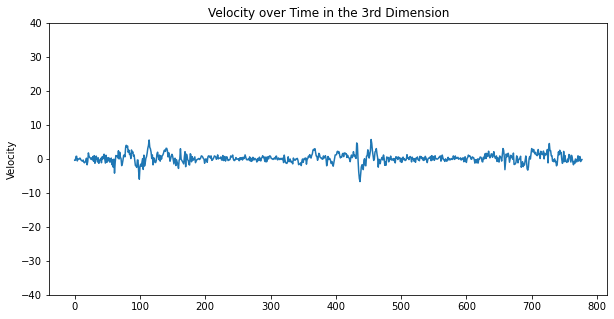

In [16]:
fig = plt.figure(figsize=(10,5))
plt.plot(vel3_mean[0:778])
plt.title("Velocity over Time in the 3rd Dimension")
plt.ylabel("Velocity")
plt.ylim([-40,40])
plt.show()

This code plots velocity in the first dimension against the 2nd dimension. It gives us insight into the direction that the wave is hitting the sensor. The values are greater in the 2nd dimenion, so it might suggest that the sensor in that dimension is oriented more perpendicular to the direction of the waves. I never worked with this data too much, but a big improvement would be to keep the scales of the x and y axis the same to show how much greater the values are in the 2nd dimension.

Text(0, 0.5, 'Velocity in the 2nd Dimension')

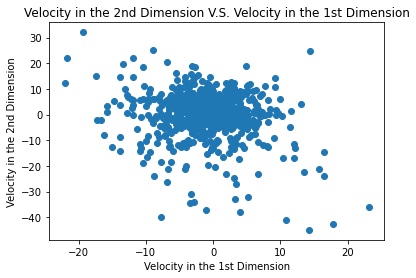

In [17]:
plt.scatter(vel1_mean, vel2_mean)
plt.title("Velocity in the 2nd Dimension V.S. Velocity in the 1st Dimension")
plt.xlabel("Velocity in the 1st Dimension")
plt.ylabel("Velocity in the 2nd Dimension")